# 1. import package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tensorflow import keras
from tensorflow.keras import layers

2023-12-16 18:01:14.578177: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 2. read and preprocess data

In [19]:
df_5 = pd.read_csv("data/ZDT1_5var100gen/ZDT1_5var100gen.csv")
rank_5 = pd.read_csv("data/ZDT1_5var100gen/rank_info.csv",header=None)
df_5["RANK"] = rank_5
df_ml_5 = df_5.copy()
df_ml_5 = df_ml_5.drop(columns=["Unnamed: 0"])
X_5 = df_ml_5.iloc[:, :5]
Y_5 = df_ml_5.loc[:, "RANK"]
pca_5 = PCA(n_components=2)
X_pca_5 = pca_5.fit_transform(X_5)
df_5_pca = pd.DataFrame({"com1": X_pca_5[:, 0], "com2": X_pca_5[:, 1], "rank": Y_5})

In [20]:
df_10 = pd.read_csv("data/ZDT1_10var100gen/ZDT1_10var100gen.csv")
rank_10 = pd.read_csv("data/ZDT1_10var100gen/rank_info.csv",header=None)
df_10["RANK"] = rank_10
df_ml_10 = df_10.copy()
df_ml_10 = df_ml_10.drop(columns=["Unnamed: 0"])
X_10 = df_ml_10.iloc[:, :10]
Y_10 = df_ml_10.loc[:, "RANK"]
pca_10 = PCA(n_components=2)
X_pca_10 = pca_10.fit_transform(X_10)
df_10_pca = pd.DataFrame({"com1": X_pca_10[:, 0], "com2": X_pca_10[:, 1], "rank": Y_10})

In [21]:
df_15 = pd.read_csv("data/ZDT1_15var100gen/ZDT1_15var100gen.csv")
rank_15 = pd.read_csv("data/ZDT1_15var100gen/rank_info.csv",header=None)
df_15["RANK"] = rank_15
df_ml_15 = df_15.copy()
df_ml_15 = df_ml_15.drop(columns=["Unnamed: 0"])
X_15 = df_ml_15.iloc[:, :15]
Y_15 = df_ml_15.loc[:, "RANK"]
pca_15 = PCA(n_components=2)
X_pca_15 = pca_15.fit_transform(X_15)
df_15_pca = pd.DataFrame({"com1": X_pca_15[:, 0], "com2": X_pca_15[:, 1], "rank": Y_15})

In [22]:
df_merged = pd.concat([df_5_pca, df_10_pca, df_15_pca], ignore_index=True)

# 3. train models

## 3.1. Logistic Regression

In [23]:
precision_pca_lr = [] 
recall_pca_lr = [] 
f1_pca_lr = []
for i in range(11):
    Y = df_merged["rank"].apply(lambda x: 1 if x <= i else 0)
    X = df_merged.iloc[:, :2]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=888, stratify=Y)
    lr_cl = LogisticRegression(penalty="l2")
    lr_cl.fit(X_train, y_train)
    test_predict = lr_cl.predict(X_test)
    precision_pca_lr.append(precision_score(y_pred=test_predict, y_true=y_test))
    recall_pca_lr.append(recall_score(y_pred=test_predict, y_true=y_test))
    f1_pca_lr.append(f1_score(y_pred=test_predict, y_true=y_test))

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3.2. SVM

In [24]:
precision_pca_svm = [] 
recall_pca_svm = [] 
f1_pca_svm = []
for i in range(11):
    Y = df_merged["rank"].apply(lambda x: 1 if x <= i else 0)
    X = df_merged.iloc[:, :2]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=888, stratify=Y)
    svm_cl = svm.SVC(kernel="linear")
    svm_cl.fit(X_train, y_train)
    test_predict = svm_cl.predict(X_test)
    precision_pca_svm.append(precision_score(y_pred=test_predict, y_true=y_test))
    recall_pca_svm.append(recall_score(y_pred=test_predict, y_true=y_test))
    f1_pca_svm.append(f1_score(y_pred=test_predict, y_true=y_test))

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3.3. Decision Tree

In [25]:
precision_pca_dt = [] 
recall_pca_dt = [] 
f1_pca_dt = []
for i in range(11):
    Y = df_merged["rank"].apply(lambda x: 1 if x <= i else 0)
    X = df_merged.iloc[:, :2]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=888, stratify=Y)
    dt_cl = DecisionTreeClassifier(random_state=0, max_depth=3)
    dt_cl.fit(X_train, y_train)
    test_predict = dt_cl.predict(X_test)
    precision_pca_dt.append(precision_score(y_pred=test_predict, y_true=y_test))
    recall_pca_dt.append(recall_score(y_pred=test_predict, y_true=y_test))
    f1_pca_dt.append(f1_score(y_pred=test_predict, y_true=y_test))

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3.4. Feedforward Neural Network

In [26]:
def FNN():
    fnnmodel = keras.Sequential([
        layers.Input(shape=(2,)),
        layers.Dense(24, activation='relu'),
        layers.Dense(12, activation='relu'),
        layers.Dense(1, activation='sigmoid') 
    ])
    return fnnmodel

In [27]:
precision_pca_fnn = [] 
recall_pca_fnn = [] 
f1_pca_fnn = []
for i in range(11):
    Y = df_merged["rank"].apply(lambda x: 1 if x <= i else 0)
    X = df_merged.iloc[:, :2]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=888, stratify=Y)
    fnn_cl = FNN()
    fnn_cl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    fnn_cl.fit(X_train, y_train)
    test_predict = fnn_cl.predict(X_test)
    precision_pca_fnn.append(precision_score(y_pred=(test_predict > 0.5), y_true=y_test))
    recall_pca_fnn.append(recall_score(y_pred=(test_predict > 0.5), y_true=y_test))
    f1_pca_fnn.append(f1_score(y_pred=(test_predict > 0.5), y_true=y_test))

155/155 [==============================] - 0s 1ms/step


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 0s 1ms/step


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


155/155 [==============================] - 0s 1ms/step


# 4. Result Visualization

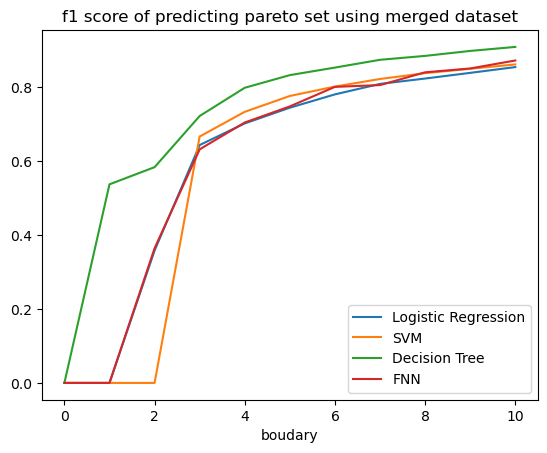

In [28]:
plt.plot(f1_pca_lr, label="Logistic Regression")
plt.plot(f1_pca_svm, label="SVM")
plt.plot(f1_pca_dt, label = "Decision Tree")
plt.plot(f1_pca_fnn, label = "FNN")
plt.xlabel("boudary")
plt.title("f1 score of predicting pareto set using merged dataset")
plt.legend()